<a href="https://colab.research.google.com/github/sergio-cabrales/python-semana-4/blob/main/MachineLearningFULL_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=bf404101f1711a40657398ffef82435061318c65131811d9e43eb2c975851386
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [2]:
pip install yfinance

     |████████████████████████████████| 6.3MB 16.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.60-py2.py3-none-any.whl size=23819 sha256=6eadb00cd859c40f22c0ecdde66aa068976dbebb08cf44da05c351b943fdf216
  Stored in directory: /root/.cache/pip/wheels/f0/be/a4/846f02c5985562250917b0ab7b33fff737c8e6e8cd5209aa3b
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
# Import the libraries
import pandas as pd
import pandas_datareader as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

from ta import add_all_ta_features
from ta.utils import dropna

In [3]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [5]:
# Get the stock quote
# df = web.DataReader('AAPL', data_source='yahoo',start='2010-01-01', end='2019-12-31')
df = pdr.get_data_yahoo("TSLA", start="2010-01-01", end="2020-12-31")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000
2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600


In [6]:
# Clean NaN values
df = dropna(df)

In [7]:
 add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,6.590844e+07,93831500,NaN,NaN,NaN,NaN,NaN,-8.629515e+07,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,5.920667,2.936666,NaN,0.617069,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.254000,59.281639,56.240859,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.115997,NaN,0.000000
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,-7.233301e+06,7896000,NaN,NaN,NaN,1.852590,NaN,-8.664965e+07,997.488471,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,6.257333,3.341333,NaN,0.488569,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.796000,59.281639,56.240859,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.251153,-0.251469,-0.251153
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,-2.374361e+07,-33198000,NaN,NaN,NaN,-2.070595,NaN,-3.440576e+06,919.213125,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,6.062667,3.365333,NaN,0.380623,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.796000,59.281639,56.240859,NaN,NaN,NaN,NaN,5.00000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.847243,-8.172259,-8.078688
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,-4.370572e+07,-58897000,NaN,NaN,NaN,-1.496416,NaN,-6.454677e+06,803.683552,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,5.783333,3.321333,NaN,0.210669,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.796000,59.281639,56.240859,NaN,NaN,NaN,NaN,6.08400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.568312,-13.431241,-19.631645
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,-7.342935e+07,-93231500,NaN,NaN,NaN,-1.452568,NaN,-8.755639e+06,803.683552,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,5.486000,3.182800,NaN,0.017020,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.625000,59.281639,56.240859,NaN,NaN,NaN,NaN,5.99032,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.093751,-17.547010,-32.565928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000,3.352190e+09,5094615000,0.457100,6.932442e+08,68.285928,434

In [8]:
# Create the Target column
# df['Target'] = np.where(df['Close'].shift(-1) > df['Open'].shift(-1), +1, -1)
df['Up_Down'] = np.where(df['Close'] > df['Open'], 1, -1)
df['Target'] = df['Up_Down'].shift(-1)
# Show the data
df

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,Up_Down,Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,6.590844e+07,93831500,NaN,NaN,NaN,NaN,NaN,-8.629515e+07,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,5.920667,2.936666,NaN,0.617069,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.254000,59.281639,56.240859,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.115997,NaN,0.000000,1,-1.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,-7.233301e+06,7896000,NaN,NaN,NaN,1.852590,NaN,-8.664965e+07,997.488471,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,6.257333,3.341333,NaN,0.488569,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.796000,59.281639,56.240859,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.251153,-0.251469,-0.251153,-1,-1.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,-2.374361e+07,-33198000,NaN,NaN,NaN,-2.070595,NaN,-3.440576e+06,919.213125,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,6.062667,3.365333,NaN,0.380623,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.796000,59.281639,56.240859,NaN,NaN,NaN,NaN,5.00000,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.847243,-8.172259,-8.078688,-1,-1.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,-4.370572e+07,-58897000,NaN,NaN,NaN,-1.496416,NaN,-6.454677e+06,803.683552,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,5.783333,3.321333,NaN,0.210669,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.796000,59.281639,56.240859,NaN,NaN,NaN,NaN,6.08400,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.568312,-13.431241,-19.631645,-1,-1.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,-7.342935e+07,-93231500,NaN,NaN,NaN,-1.452568,NaN,-8.755639e+06,803.683552,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,5.486000,3.182800,NaN,0.017020,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.625000,59.281639,56.240859,NaN,NaN,NaN,NaN,5.99032,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.093751,-17.547010,-32.565928,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000,3.352190e+09,5094615000,0.457100,6.932442e+08,68.285928,434.304047,111.453596,

In [9]:
#Remove the first 29 days of data
df = df[29:]
#Remove the last day of data
df = df[:-1]
# Clean NaN values
# df = dropna(df)
# df = df.drop(columns=['High','Low','Open','Close','Volume','Adj Close'])
df

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,Up_Down,Target
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-10,3.930000,3.930000,3.764000,3.806000,3.806000,6406500,-2.933029e+07,-64709500,0.052482,-1.841749e+05,37.056051,-0.248748,-0.131207,-1.842372e+05,728.392678,4.113382,0.273848,4.104000,4.401286,3.806714,14.487638,-0.001200,0.0,1.0,4.082467,4.257667,3.907267,8.583040,-0.289004,0.0,1.0,3.552000,4.450,4.001000,21.881086,0.282851,7.212146,-0.070402,NaN,NaN,...,NaN,-160.628623,0.086000,-327.648473,-458.097941,130.449468,4.100000,3.723000,3.911500,4.540000,NaN,4.796000,80.0,4.0,76.0,3.397598,NaN,0.0,0.0,NaN,40.198566,0.000000,1.638070e-03,NaN,NaN,46.047718,6.250009,5.034234,-93.749991,NaN,3.984144,-10.615310,-65.236754,NaN,NaN,-2.908165,-2.951291,-20.343238,-1,-1.0
2010-08-11,3.738000,3.776000,3.570000,3.580000,3.580000,3988000,-3.293110e+07,-68697500,-0.100313,-2.866196e+05,29.035392,-0.898797,-0.227433,-4.231188e+05,685.140761,4.073855,0.270063,4.084600,4.456204,3.712996,18.195381,-0.178948,0.0,1.0,4.032467,4.220467,3.844467,9.324313,-0.703370,0.0,1.0,3.570000,4.450,4.010000,21.544334,0.011364,8.666028,-0.101917,NaN,NaN,...,NaN,-240.789990,0.025400,-318.727318,-422.879575,104.152257,4.003000,3.723000,3.863000,4.540000,NaN,4.625000,76.0,12.0,64.0,3.418646,NaN,0.0,0.0,NaN,35.183561,0.000000,1.638070e-03,0.030879,NaN,36.727206,1.154733,4.299748,-98.845267,NaN,3.944791,-14.558476,-65.116820,NaN,NaN,-5.937995,-6.121599,-25.073252,-1,-1.0
2010-08-12,3.560000,3.580000,3.478000,3.520000,3.520000,3455000,-3.354081e+07,-72152500,-0.069144,-2.752882e+05,22.998157,-0.425123,-0.279656,-2.947122e+05,673.657966,4.028481,0.253257,4.061700,4.506080,3.617320,21.881502,-0.109500,0.0,1.0,3.976867,4.157467,3.796267,9.082522,-0.764859,0.0,1.0,3.478000,4.450,3.964000,23.930864,0.043210,10.128238,-0.130233,NaN,NaN,...,NaN,-231.584943,0.082300,-308.084436,-391.727525,83.643089,3.957000,3.782000,3.869500,4.540000,NaN,4.540000,72.0,8.0,64.0,3.439273,NaN,0.0,0.0,NaN,33.971828,0.000000,6.938894e-18,0.001092,NaN,31.095958,4.384140,3.929627,-95.615860,NaN,3.904391,-14.355234,-65.256925,NaN,NaN,-1.675976,-1.690179,-26.329006,-1,1.0
2010-08-13,3.636000,3.690000,3.532000,3.664000,3.664000,3170000,-3.141410e+07,-68982500,-0.046073,-1.707499e+05,29.196490,0.408707,-0.219976,7.177689e+04,701.216711,3.991604,0.244931,4.038500,4.513973,3.563027,23.547031,0.106182,0.0,0.0,3.940200,4.118800,3.761600,9.065526,-0.273236,0.0,1.0,3.478000,4.450,3.964000,24.068339,0.191358,10.988405,-0.139446,NaN,NaN,...,NaN,-153.638898,0.031500,-294.506918,-364.854536,70.347618,3.957000,3.880000,3.918500,4.540000,NaN,4.540000,68.0,4.0,64.0,3.459488,NaN,0.0,0.0,NaN,39.368907,0.239307,7.976916e-02,0.027136,NaN,36.144927,19.415461,8.318111,-80.584539,NaN,3.894591,-11.583012,-65.454085,NaN,NaN,4.090911,4.009447,-23.315192,1,1.0
2010-08-16,3.690000,3.760000,3.652000,3.756000,3.756000,24290

In [10]:
#Split tha data set into a feature or independent data set (X) and a Target or dependent data set (Y)
Y = df['Target'].values
Y

array([-1., -1.,  1., ..., -1.,  1.,  1.])

In [11]:
X = df.drop(columns='Target')
X

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,Up_Down
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-10,3.930000,3.930000,3.764000,3.806000,3.806000,6406500,-2.933029e+07,-64709500,0.052482,-1.841749e+05,37.056051,-0.248748,-0.131207,-1.842372e+05,728.392678,4.113382,0.273848,4.104000,4.401286,3.806714,14.487638,-0.001200,0.0,1.0,4.082467,4.257667,3.907267,8.583040,-0.289004,0.0,1.0,3.552000,4.450,4.001000,21.881086,0.282851,7.212146,-0.070402,NaN,NaN,...,NaN,NaN,-160.628623,0.086000,-327.648473,-458.097941,130.449468,4.100000,3.723000,3.911500,4.540000,NaN,4.796000,80.0,4.0,76.0,3.397598,NaN,0.0,0.0,NaN,40.198566,0.000000,1.638070e-03,NaN,NaN,46.047718,6.250009,5.034234,-93.749991,NaN,3.984144,-10.615310,-65.236754,NaN,NaN,-2.908165,-2.951291,-20.343238,-1
2010-08-11,3.738000,3.776000,3.570000,3.580000,3.580000,3988000,-3.293110e+07,-68697500,-0.100313,-2.866196e+05,29.035392,-0.898797,-0.227433,-4.231188e+05,685.140761,4.073855,0.270063,4.084600,4.456204,3.712996,18.195381,-0.178948,0.0,1.0,4.032467,4.220467,3.844467,9.324313,-0.703370,0.0,1.0,3.570000,4.450,4.010000,21.544334,0.011364,8.666028,-0.101917,NaN,NaN,...,NaN,NaN,-240.789990,0.025400,-318.727318,-422.879575,104.152257,4.003000,3.723000,3.863000,4.540000,NaN,4.625000,76.0,12.0,64.0,3.418646,NaN,0.0,0.0,NaN,35.183561,0.000000,1.638070e-03,0.030879,NaN,36.727206,1.154733,4.299748,-98.845267,NaN,3.944791,-14.558476,-65.116820,NaN,NaN,-5.937995,-6.121599,-25.073252,-1
2010-08-12,3.560000,3.580000,3.478000,3.520000,3.520000,3455000,-3.354081e+07,-72152500,-0.069144,-2.752882e+05,22.998157,-0.425123,-0.279656,-2.947122e+05,673.657966,4.028481,0.253257,4.061700,4.506080,3.617320,21.881502,-0.109500,0.0,1.0,3.976867,4.157467,3.796267,9.082522,-0.764859,0.0,1.0,3.478000,4.450,3.964000,23.930864,0.043210,10.128238,-0.130233,NaN,NaN,...,NaN,NaN,-231.584943,0.082300,-308.084436,-391.727525,83.643089,3.957000,3.782000,3.869500,4.540000,NaN,4.540000,72.0,8.0,64.0,3.439273,NaN,0.0,0.0,NaN,33.971828,0.000000,6.938894e-18,0.001092,NaN,31.095958,4.384140,3.929627,-95.615860,NaN,3.904391,-14.355234,-65.256925,NaN,NaN,-1.675976,-1.690179,-26.329006,-1
2010-08-13,3.636000,3.690000,3.532000,3.664000,3.664000,3170000,-3.141410e+07,-68982500,-0.046073,-1.707499e+05,29.196490,0.408707,-0.219976,7.177689e+04,701.216711,3.991604,0.244931,4.038500,4.513973,3.563027,23.547031,0.106182,0.0,0.0,3.940200,4.118800,3.761600,9.065526,-0.273236,0.0,1.0,3.478000,4.450,3.964000,24.068339,0.191358,10.988405,-0.139446,NaN,NaN,...,NaN,NaN,-153.638898,0.031500,-294.506918,-364.854536,70.347618,3.957000,3.880000,3.918500,4.540000,NaN,4.540000,68.0,4.0,64.0,3.459488,NaN,0.0,0.0,NaN,39.368907,0.239307,7.976916e-02,0.027136,NaN,36.144927,19.415461,8.318111,-80.584539,NaN,3.894591,-11.583012,-65.454085,NaN,NaN,4.090911,4.009447,-23.315192,1
2010-08-16,3.690000,3.760000,3.652000,3.756000,3.756000,242

In [12]:
X.fillna(X.mean(), inplace=True)

In [13]:
# Split the data again but this time into 80% trading and 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.05, random_state=2)

In [14]:
# Create and train the decision tree classsifier model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

In [15]:
#Check how well the model did on the trainign data set
print(clf.score(X_train,Y_train))

1.0


In [16]:
#Check how weel the model did on the testing data set
print(clf.score(X_test,Y_test))

0.549618320610687


In [17]:
#Show the model tree predictions
tree_predictions = clf.predict(X_test)
print(tree_predictions)

[-1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.
  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
  1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.
 -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1.]


In [18]:
Y_test

array([-1., -1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1.])

In [19]:
# Get the model metrics
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
#print(classification_report(Y_test, tree_predictions))
print(confusion_matrix(Y_test,tree_predictions))

[[39 27]
 [32 33]]


In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, tree_predictions))

Accuracy: 0.549618320610687


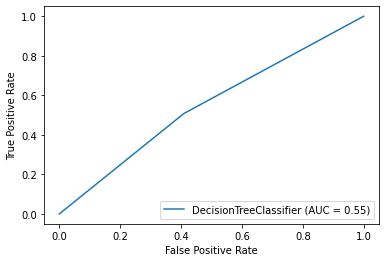

In [21]:
# Get the model metrics
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(clf, X_test, Y_test)  
plt.show()

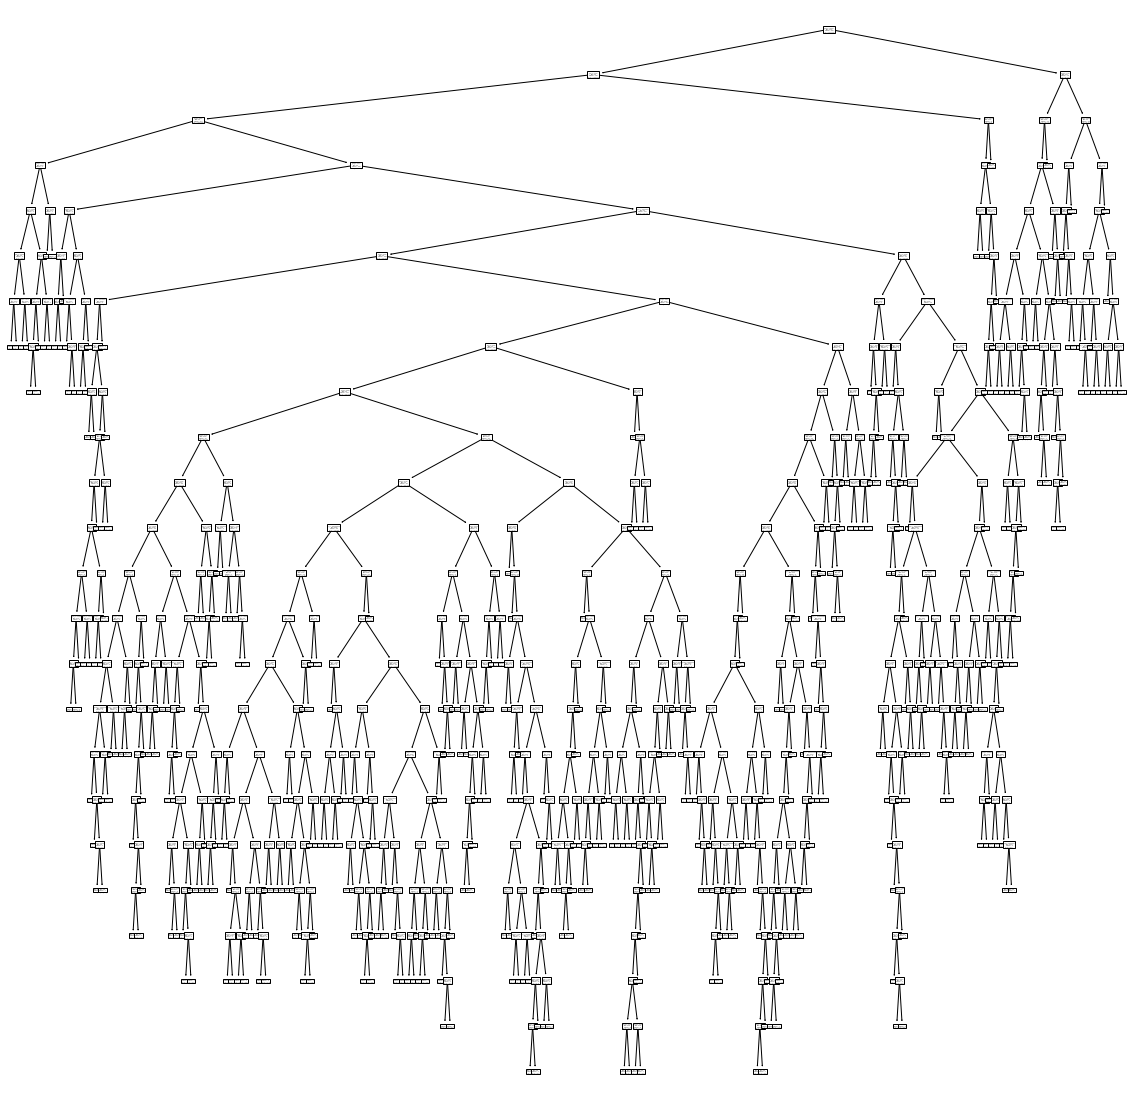

In [ ]:
# fn=['RSI','MACD']
# cn=['up', 'down']

plt.figure(figsize=(20, 20))
# tree.plot_tree(clf,1,feature_names= fn, class_names=cn, filled = True)
tree.plot_tree(clf)
plt.show()

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

In [22]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
# Train Random Forest
rf  = rf.fit(X_train,Y_train)

In [23]:
#Check how weel the model did on the testing data set
print(rf.score(X_test,Y_test))

0.5801526717557252


In [24]:
rf_predictions = rf.predict(X_test)

In [25]:
# Get the model metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, rf_predictions))
print(confusion_matrix(Y_test,rf_predictions))

              precision    recall  f1-score   support

        -1.0       0.58      0.61      0.59        66
         1.0       0.58      0.55      0.57        65

    accuracy                           0.58       131
   macro avg       0.58      0.58      0.58       131
weighted avg       0.58      0.58      0.58       131

[[40 26]
 [29 36]]


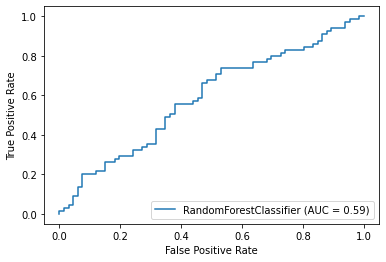

In [26]:
# Get the model metrics
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(rf, X_test, Y_test)
plt.show()

In [27]:
#A support vector machine (SVM) is a type of supervised machine learning classification algorithm.
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#Standardization
standard = StandardScaler()
standard_X_train = standard.fit_transform(X_train)
standard_X_test = standard.fit_transform(X_test)

In [28]:
#svclassifier = SVC(kernel='linear')
# Polynomial Kernel
svclassifier  = SVC(kernel='poly', degree=8)
# Gaussian Kernel
#svclassifier = SVC(kernel='rbf')
# Sigmoid Kernel
# svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(standard_X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
svm_predictions = svclassifier.predict(standard_X_test)

In [30]:
# Get the model metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, svm_predictions))
print(confusion_matrix(Y_test,svm_predictions))

              precision    recall  f1-score   support

        -1.0       0.51      0.88      0.64        66
         1.0       0.53      0.14      0.22        65

    accuracy                           0.51       131
   macro avg       0.52      0.51      0.43       131
weighted avg       0.52      0.51      0.43       131

[[58  8]
 [56  9]]


In [31]:
#Check how weel the model did on the testing data set
print(svclassifier.score(standard_X_test,Y_test))

0.5114503816793893


In [32]:
# Multi-layer Perceptron (MLP) 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [33]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [34]:
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods
clf = MLPClassifier(solver='lbfgs', max_iter= 2000, alpha=1e-5, hidden_layer_sizes=(128,64), random_state=1)
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100), random_state=1)
clf.fit(scaled_X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 64), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [35]:
NN = clf.predict(scaled_X_test)
NN

array([-1., -1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,
       -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.])

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, NN))

Accuracy: 0.5190839694656488


In [37]:
# Get the model metrics
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(Y_test, NN))
print(confusion_matrix(Y_test,NN))

              precision    recall  f1-score   support

        -1.0       0.52      0.70      0.59        66
         1.0       0.52      0.34      0.41        65

    accuracy                           0.52       131
   macro avg       0.52      0.52      0.50       131
weighted avg       0.52      0.52      0.50       131

[[46 20]
 [43 22]]


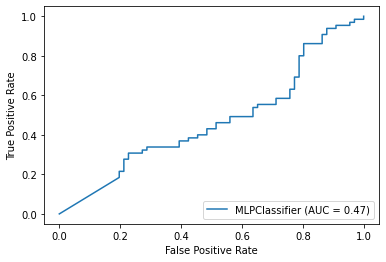

In [38]:
# Get the model metrics
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(clf, scaled_X_test, Y_test)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
#param_grid = {'solver': ['lbfgs'], 'max_iter': [2000], 'alpha': [1e-5], 'hidden_layer_sizes':np.arange(10, 20), 'random_state':[1]}
param_grid = {'solver': ['lbfgs'], 'max_iter': [1000,2000], 'alpha': [1e-5], 'hidden_layer_sizes':[(10),(50),(100),(128,64),(256,128,64)], 'random_state':[1]}

In [ ]:
cl = GridSearchCV(MLPClassifier(), param_grid, n_jobs=-1)
cl.fit(scaled_X_train, Y_train)
print(cl.score(scaled_X_test, Y_test))
print(cl.best_params_)

0.536
{'alpha': 1e-05, 'hidden_layer_sizes': 100, 'max_iter': 2000, 'random_state': 1, 'solver': 'lbfgs'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [39]:
# VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [40]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))


LogisticRegression 0.48091603053435117
RandomForestClassifier 0.46564885496183206
SVC 0.5190839694656488
VotingClassifier 0.4961832061068702
